# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click 'Run Cell' button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/ipython-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

In [1]:
import matplotlib.pyplot as plt
import glob
import pandas as pd
from tf_keras.utils import to_categorical
from tf_keras.models import Sequential, load_model
from tf_keras import layers, optimizers, regularizers, callbacks
%matplotlib inline
import math
import skimage
import imageio. v2 as imageio
import os
import random
import cv2, PIL
import numpy as np
from PIL import Image, ImageFilter
from scipy.ndimage.filters import convolve
from skimage.feature import hessian_matrix, hessian_matrix_eigvals
from skimage.morphology import convex_hull_image, erosion, square
from sklearn.model_selection import train_test_split


path = r"C:\Users\gamin\.cache\kagglehub\datasets\ruizgara\socofing\versions\2\SOCOFing"
print("Path to dataset files:", path)

C:\Users\gamin\AppData\Local\Temp\ipykernel_9748\3227333604.py:16: DeprecationWarning: Please import `convolve` from the `scipy.ndimage` namespace; the `scipy.ndimage.filters` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.filters import convolve


Path to dataset files: C:\Users\gamin\.cache\kagglehub\datasets\ruizgara\socofing\versions\2\SOCOFing


6000


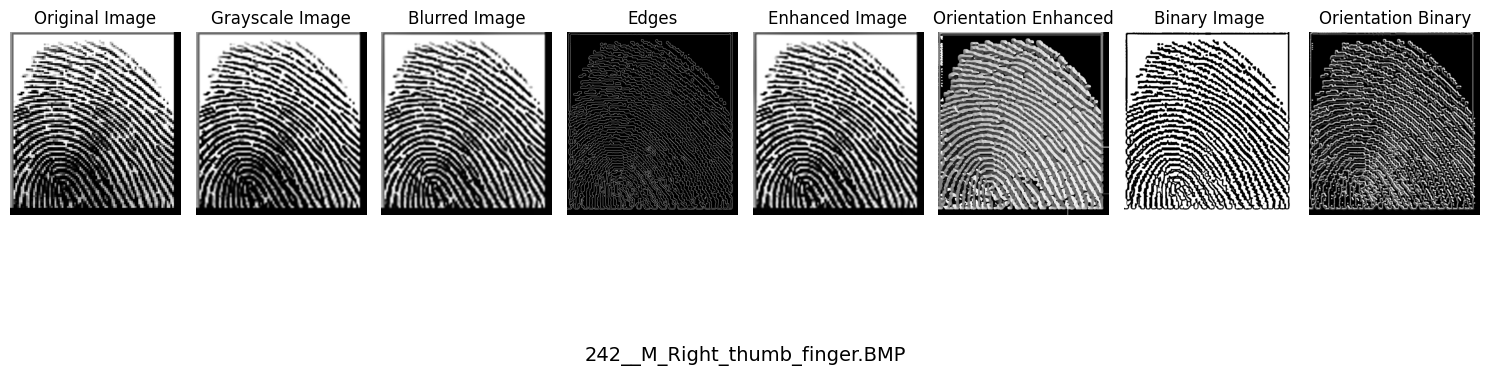

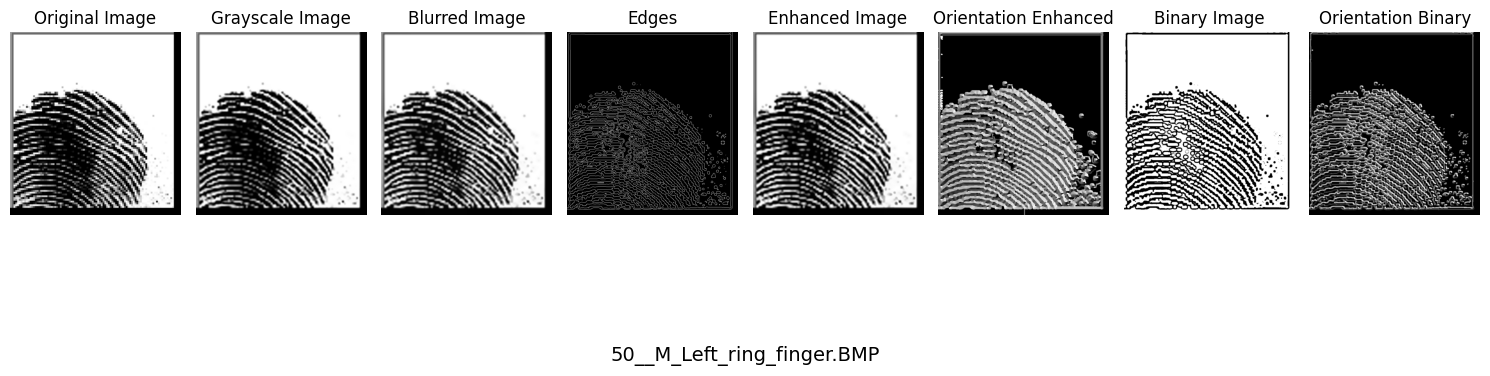

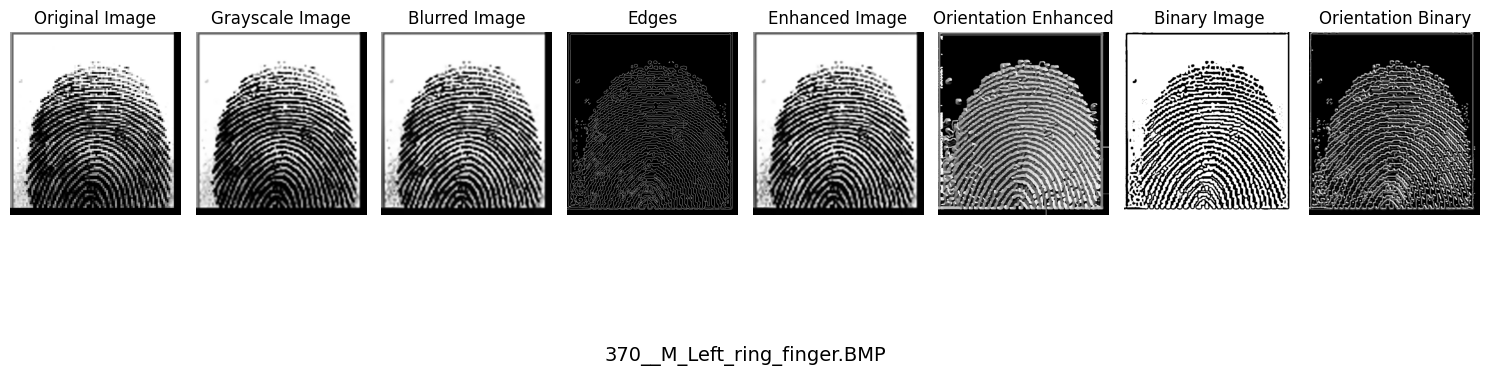

In [2]:
image_dir_altered = r"C:\Users\gamin\.cache\kagglehub\datasets\ruizgara\socofing\versions\2\SOCOFing\Altered"
image_dir_real = r"C:\Users\gamin\.cache\kagglehub\datasets\ruizgara\socofing\versions\2\SOCOFing\Real"

all_images = [f for f in os.listdir(image_dir_real) if f.endswith(('.BMP'))]

num_images = len(all_images)
print(num_images)

selected_images = random.sample(all_images, 3)

r = random.randint(0,num_images)
display_list = all_images[r:r+3]


def process_and_plot(image_path, image_name):
    # Load the fingerprint image
    image = cv2.imread(image_path)
    
    # Resizing images
    resized_image = cv2.resize(image, (0, 0), fx=7, fy=7, interpolation=cv2.INTER_CUBIC)
    
    # Denoising
    denoised_image = cv2.fastNlMeansDenoising(resized_image, None, 7, 7, 21)
    
    # Convert to grayscale
    gray_image = cv2.cvtColor(denoised_image, cv2.COLOR_BGR2GRAY)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    enhanced_image = clahe.apply(gray_image)
    
    # Working from here
    
    # Blurring
    blurred_image = cv2.GaussianBlur(enhanced_image, (3, 3), 0)
    
    
    #Adaptive threshold    
    binary_image = cv2.adaptiveThreshold(enhanced_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

        
    # Edge
    edges = cv2.Canny(binary_image, threshold1=60, threshold2=120)
    
    # Use gradient-based methods to compute orientation fields
    gradient_x = cv2.Sobel(enhanced_image, cv2.CV_64F, 1, 0, ksize=5)
    gradient_y = cv2.Sobel(enhanced_image, cv2.CV_64F, 0, 1, ksize=5)
    orientation_enhanced = cv2.phase(gradient_x, gradient_y, angleInDegrees=True)
    
    orientation_enhanced_normalized = cv2.normalize(orientation_enhanced, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')
    output_dir = "Enhanced_processed_images"
    os.makedirs(output_dir, exist_ok=True)
    cv2.imwrite(os.path.join(output_dir, f"{image_name}_enhanced.jpg"), enhanced_image)

    
    gradient_x = cv2.Sobel(binary_image, cv2.CV_64F, 1, 0, ksize=5)
    gradient_y = cv2.Sobel(binary_image, cv2.CV_64F, 0, 1, ksize=5)
    orientation_binary = cv2.phase(gradient_x, gradient_y, angleInDegrees=True)
    
    orientation_binary_normalized = cv2.normalize(orientation_binary, None, 0, 255, cv2.NORM_MINMAX).astype('uint8')
    output_dir = "Binary_processed_images"
    os.makedirs(output_dir, exist_ok=True)
    cv2.imwrite(os.path.join(output_dir, f"{image_name}_binary.jpg"), binary_image)


    # Plot the results
    fig, axes = plt.subplots(1, 8, figsize=(15, 5))

    axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axes[0].set_title("Original Image")
    axes[0].axis("off")
    
    axes[1].imshow(gray_image, cmap="gray")
    axes[1].set_title("Grayscale Image")
    axes[1].axis("off")
    
    axes[2].imshow(cv2.cvtColor(blurred_image, cv2.COLOR_BGR2RGB))
    axes[2].set_title("Blurred Image")
    axes[2].axis("off")

    axes[3].imshow(edges, cmap="gray")
    axes[3].set_title("Edges")
    axes[3].axis("off")
    
    axes[4].imshow(enhanced_image, cmap="gray")
    axes[4].set_title("Enhanced Image")
    axes[4].axis("off")

    axes[5].imshow(orientation_enhanced, cmap="gray")
    axes[5].set_title("Orientation Enhanced")
    axes[5].axis("off")
    
    axes[6].imshow(binary_image, cmap="gray")
    axes[6].set_title("Binary Image")
    axes[6].axis("off")
    
    axes[7].imshow(orientation_binary, cmap="gray")
    axes[7].set_title("Orientation Binary")
    axes[7].axis("off")


    
    fig.suptitle(image_name, fontsize=14, y=0.02)
    plt.tight_layout(rect=[0, 0.05, 1, 0.95])
    plt.show()
    
    
    

for img_name in selected_images:
    img_path = os.path.join(image_dir_real, img_name)
    process_and_plot(img_path, img_name)
    



<class 'str'>
33__M_Left_thumb_finger.BMP
<class 'numpy.float64'>
<class 'numpy.float64'>


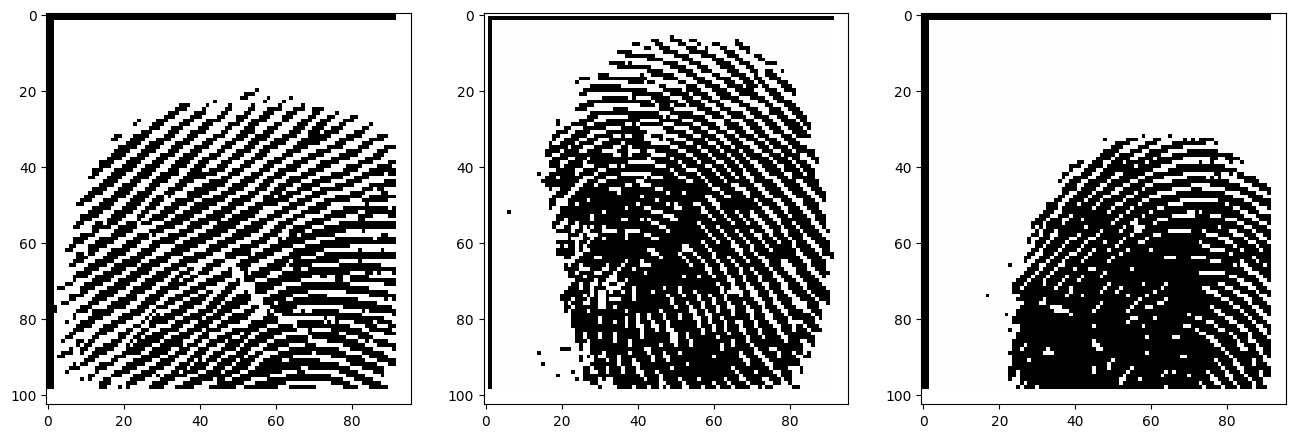

In [3]:
print(type(display_list[0])) 
print(display_list[0])

str_1 = fr"C:\Users\gamin\.cache\kagglehub\datasets\ruizgara\socofing\versions\2\SOCOFing\Real\{display_list[0]}"
image1 = imageio.imread(str_1)

str_2 = fr"C:\Users\gamin\.cache\kagglehub\datasets\ruizgara\socofing\versions\2\SOCOFing\Real\{display_list[1]}"
image2 = imageio.imread(str_2)

str_3 = fr"C:\Users\gamin\.cache\kagglehub\datasets\ruizgara\socofing\versions\2\SOCOFing\Real\{display_list[2]}"
image3 = imageio.imread(str_3)


THRESHOLD1 = image1.mean()
THRESHOLD2 = image2.mean()
THRESHOLD3 = image3.mean()

print(type(THRESHOLD1))
print(type(THRESHOLD2))


image1 = np.array(image1 > THRESHOLD1).astype(int) * 255
image2 = np.array(image2 > THRESHOLD2).astype(int) * 254
image3 = np.array(image3 > THRESHOLD3).astype(int) * 254

fig, axes = plt.subplots(1,3,figsize = (16,16));
axes[0].imshow(image1);
axes[1].imshow(image2);
axes[2].imshow(image3);

In [4]:
for img_name in display_list:
        img_path = os.path.join(image_dir_real, img_name)

        gray_img_array = np.array(Image.open(img_path).convert('P'))

        print(f"Processed {img_name}: shape {gray_img_array.shape}")

Processed 33__M_Left_thumb_finger.BMP: shape (103, 96)
Processed 33__M_Right_index_finger.BMP: shape (103, 96)
Processed 33__M_Right_little_finger.BMP: shape (103, 96)


In [5]:
# Matrix

vertical_robert_filter = np.array([[1,0],[0,-1]])
horizontal_robert_filter = np.array([[0,1],[-1,0]])

vertical_sobel_filter = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
horizontal_sobel_filter = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])

vertical_prewitt_filter = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
horizontal_prewitt_filter = np.array([[-1,-1,-1],[0,0,0],[1,1,1]])

print("vertical robert filter\n",vertical_robert_filter )
print("horizontal robert filter\n",horizontal_robert_filter)
print("vertical sobel filter: \n", vertical_sobel_filter)
print("horizontal sobel filter: \n", horizontal_sobel_filter)

print("vertical prewitt filter: \n", vertical_prewitt_filter)
print("horizontal prewitt filter: \n", horizontal_prewitt_filter)

vertical robert filter
 [[ 1  0]
 [ 0 -1]]
horizontal robert filter
 [[ 0  1]
 [-1  0]]
vertical sobel filter: 
 [[-1  0  1]
 [-2  0  2]
 [-1  0  1]]
horizontal sobel filter: 
 [[-1 -2 -1]
 [ 0  0  0]
 [ 1  2  1]]
vertical prewitt filter: 
 [[-1  0  1]
 [-1  0  1]
 [-1  0  1]]
horizontal prewitt filter: 
 [[-1 -1 -1]
 [ 0  0  0]
 [ 1  1  1]]


In [6]:
gray_img = Image.fromarray(gray_img_array)

convolved_img1 = convolve(gray_img,vertical_robert_filter)
convolved_img1 = convolve(convolved_img1,horizontal_robert_filter)

convolved_img2 = convolve(gray_img,vertical_sobel_filter)
convolved_img2 = convolve(convolved_img2,horizontal_sobel_filter)

convolved_img3 =  convolve(gray_img,vertical_prewitt_filter )
convolved_img3 =  convolve(gray_img,horizontal_prewitt_filter )

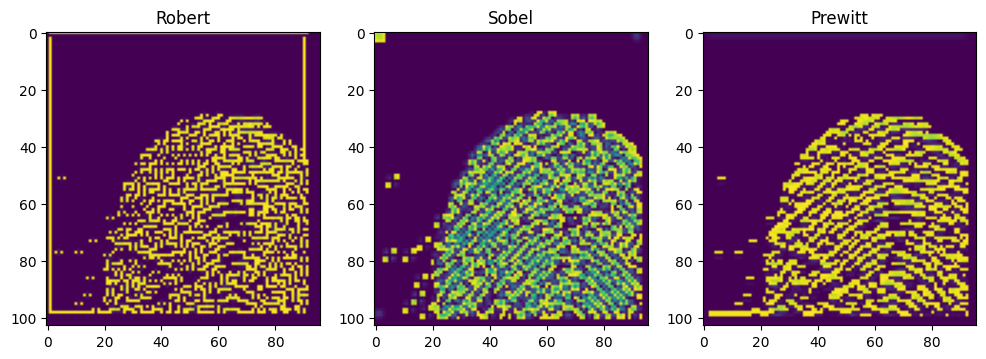

In [7]:
fig, axes = plt.subplots(1,3,figsize = (12,12));
axes[0].set_title("Robert");
axes[0].imshow(convolved_img1);
axes[1].set_title("Sobel");
axes[1].imshow(convolved_img2);
axes[2].set_title("Prewitt");
axes[2].imshow(convolved_img3);

C:\Users\gamin\.cache\kagglehub\datasets\ruizgara\socofing\versions\2\SOCOFing\Real\33__M_Right_little_finger.BMP


C:\Users\gamin\AppData\Local\Temp\ipykernel_9748\3486736269.py:5: FutureWarning: use_gaussian_derivatives currently defaults to False, but will change to True in a future version. Please specify this argument explicitly to maintain the current behavior
  H_elems = hessian_matrix(gray, sigma=sigma, order='rc')


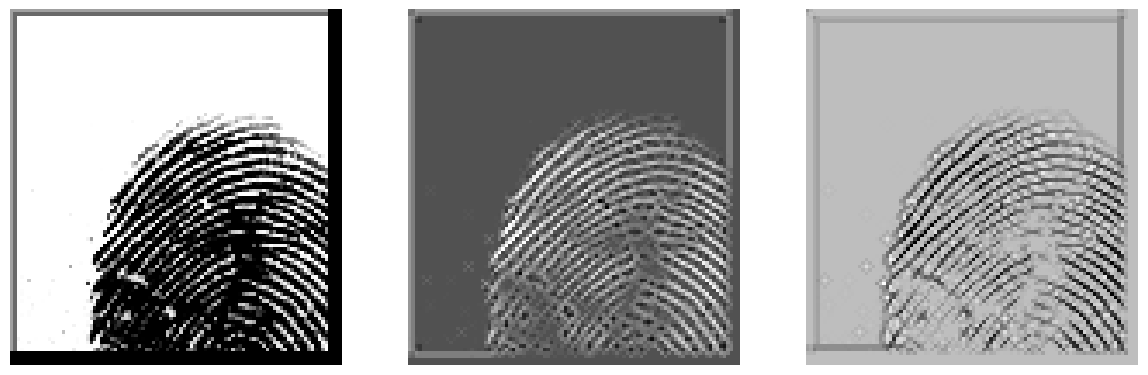

In [8]:
src_path = fr"C:\Users\gamin\.cache\kagglehub\datasets\ruizgara\socofing\versions\2\SOCOFing\Real\{img_name}"
print(src_path)

def detect_ridges(gray, sigma= 0.1):
    H_elems = hessian_matrix(gray, sigma=sigma, order='rc')
    maxima_ridges, minima_ridges = hessian_matrix_eigvals(H_elems)
    return maxima_ridges, minima_ridges

def plot_images(*images):
    images = list(images)
    n = len(images)
    fig, ax = plt.subplots(ncols=n, sharey=True, figsize = (12,12))
    for i, img in enumerate(images):
        ax[i].imshow(img, cmap='gray')
        ax[i].axis('off')
    plt.subplots_adjust(left=0.03, bottom=0.03, right=0.97, top=0.97)
    plt.show()

img = cv2.imread(src_path, 0) # 0 imports a grayscale
if img is None:
    raise(ValueError(f"Image didn\'t load. Check that '{src_path}' exists."))

a, b = detect_ridges(img, sigma=0.15)

plot_images(img, a, b)

In [9]:
def getTerminationBifurcation(img, mask):
    img = img == 255;
    (rows, cols) = img.shape;
    minutiaeTerm = np.zeros(img.shape);
    minutiaeBif = np.zeros(img.shape);
    
    for i in range(1,rows-1):
        for j in range(1,cols-1):
            if(img[i][j] == 1):
                block = img[i-1:i+2,j-1:j+2];
                block_val = np.sum(block);
                if(block_val == 2):
                    minutiaeTerm[i,j] = 1;
                elif(block_val == 4):
                    minutiaeBif[i,j] = 1;
    
    mask = convex_hull_image(mask>0)
    mask = erosion(mask, square(5))         
    minutiaeTerm = np.uint8(mask)*minutiaeTerm
    return(minutiaeTerm, minutiaeBif)

In [10]:
class MinutiaeFeature(object):
    def __init__(self, locX, locY, Orientation, Type):
        self.locX = locX;
        self.locY = locY;
        self.Orientation = Orientation;
        self.Type = Type;

def computeAngle(block, minutiaeType):
    angle = 0
    (blkRows, blkCols) = np.shape(block);
    CenterX, CenterY = (blkRows-1)/2, (blkCols-1)/2
    if(minutiaeType.lower() == 'termination'):
        sumVal = 0;
        for i in range(blkRows):
            for j in range(blkCols):
                if((i == 0 or i == blkRows-1 or j == 0 or j == blkCols-1) and block[i][j] != 0):
                    angle = -math.degrees(math.atan2(i-CenterY, j-CenterX))
                    sumVal += 1
                    if(sumVal > 1):
                        angle = float('nan');
            return(angle)
    elif(minutiaeType.lower() == 'bifurcation'):
        (blkRows, blkCols) = np.shape(block);
        CenterX, CenterY = (blkRows - 1) / 2, (blkCols - 1) / 2
        angle = []
        sumVal = 0;
        for i in range(blkRows):
            for j in range(blkCols):
                if ((i == 0 or i == blkRows - 1 or j == 0 or j == blkCols - 1) and block[i][j] != 0):
                    angle.append(-math.degrees(math.atan2(i - CenterY, j - CenterX)))
                    sumVal += 1
        if(sumVal != 3):
            angle = float('nan')
        return(angle)


def extractMinutiaeFeatures(skel, minutiaeTerm, minutiaeBif):
    FeaturesTerm = []

    minutiaeTerm = skimage.measure.label(minutiaeTerm, connectivity=2);
    RP = skimage.measure.regionprops(minutiaeTerm)
    
    WindowSize = 2          
    FeaturesTerm = []
    for i in RP:
        (row, col) = np.int16(np.round(i['Centroid']))
        block = skel[row-WindowSize:row+WindowSize+1, col-WindowSize:col+WindowSize+1]
        angle = computeAngle(block, 'Termination')
        FeaturesTerm.append(MinutiaeFeature(row, col, angle, 'Termination'))

    FeaturesBif = []
    minutiaeBif = skimage.measure.label(minutiaeBif, connectivity=2);
    RP = skimage.measure.regionprops(minutiaeBif)
    WindowSize = 1 
    for i in RP:
        (row, col) = np.int16(np.round(i['Centroid']))
        block = skel[row-WindowSize:row+WindowSize+1, col-WindowSize:col+WindowSize+1]
        angle = computeAngle(block, 'Bifurcation')
        FeaturesBif.append(MinutiaeFeature(row, col, angle, 'Bifurcation'))
    return(FeaturesTerm, FeaturesBif)

def ShowResults(skel, TermLabel, BifLabel):
    minutiaeBif = TermLabel * 0;
    minutiaeTerm = BifLabel * 0;

    (rows, cols) = skel.shape
    DispImg = np.zeros((rows, cols, 3), np.uint8)
    DispImg[:, :, 0] = skel;
    DispImg[:, :, 1] = skel;
    DispImg[:, :, 2] = skel;

    RP = skimage.measure.regionprops(BifLabel)
    for idx, i in enumerate(RP):
        (row, col) = np.int16(np.round(i['Centroid']))
        minutiaeBif[row, col] = 1;
        (rr, cc) = skimage.draw.circle_perimeter(row, col, 1);
        skimage.draw.set_color(DispImg, (rr, cc), (255, 0, 0));

    RP = skimage.measure.regionprops(TermLabel)
    for idx, i in enumerate(RP):
        (row, col) = np.int16(np.round(i['Centroid']))
        minutiaeTerm[row, col] = 1;
        (rr, cc) = skimage.draw.circle_perimeter(row, col, 1);
        skimage.draw.set_color(DispImg, (rr, cc), (0, 0, 255));
        
    plt.figure(figsize=(6,6))
    plt.title("Minutiae extraction results")
    plt.imshow(DispImg)

C:\Users\gamin\AppData\Local\Temp\ipykernel_9748\281456182.py:18: FutureWarning: `square` is deprecated since version 0.25 and will be removed in version 0.27. Use `skimage.morphology.footprint_rectangle` instead.
  mask = erosion(mask, square(5))


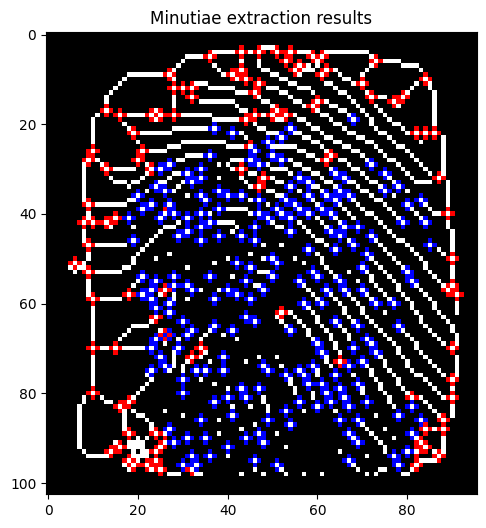

In [11]:
img_name = fr"C:\Users\gamin\.cache\kagglehub\datasets\ruizgara\socofing\versions\2\SOCOFing\Real\{display_list[1]}"
img = cv2.imread(img_name,0);

#print(f"Image type: {type(img)}, Image shape: {img.shape}")

img = np.array(img > THRESHOLD1).astype(int)
skel = skimage.morphology.skeletonize(img)
skel = np.uint8(skel)*255;
mask = img*255;

(minutiaeTerm, minutiaeBif) = getTerminationBifurcation(skel, mask);
FeaturesTerm, FeaturesBif = extractMinutiaeFeatures(skel, minutiaeTerm, minutiaeBif)
BifLabel = skimage.measure.label(minutiaeBif, connectivity=1);
TermLabel = skimage.measure.label(minutiaeTerm, connectivity=1);
ShowResults(skel, TermLabel, BifLabel)

In [12]:
img_size = 96

def load_data(path, train=True):
    print("Loading data from: ", path)
    data = []
    for img in os.listdir(path):
        imgname, ext = os.path.splitext(img)
        ID, etc = imgname.split('__')
        ID = int(ID) - 1 
        if train:
            _, lr, finger, _, _ = etc.split('_')
        else:
            _, lr, finger, _  = etc.split('_')
        if lr=='Left':
            base = 0 
        else: base  = 5 
        if finger=="little":
            fingerNum = base + 0
        elif finger=='ring':
            fingerNum = base + 1
        elif finger=='middle':
             fingerNum = base + 2
        elif finger=='index':
            fingerNum = base + 3 
        else: fingerNum = base + 4
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        img_resize = cv2.resize(img_array, (img_size, img_size))
        data.append([ID, fingerNum, img_resize])
    return data

In [13]:
Altered_path = r"C:/Users/gamin/.cache/kagglehub/datasets/ruizgara/socofing/versions/2/SOCOFing/Altered/Altered-"
Real_path = r"C:/Users/gamin/.cache/kagglehub/datasets/ruizgara/socofing/versions/2/SOCOFing/Real"


Easy_data = load_data(Altered_path+'Easy', train=True)
Medium_data = load_data(Altered_path+'Medium', train=True)
Hard_data = load_data(Altered_path+'Hard', train=True)

Real_data = load_data(Real_path, train=False)

#Altered_data = np.concatenate([tuple_0, tuple_1, tuple_2], axis=0)


Loading data from:  C:/Users/gamin/.cache/kagglehub/datasets/ruizgara/socofing/versions/2/SOCOFing/Altered/Altered-Easy
Loading data from:  C:/Users/gamin/.cache/kagglehub/datasets/ruizgara/socofing/versions/2/SOCOFing/Altered/Altered-Medium
Loading data from:  C:/Users/gamin/.cache/kagglehub/datasets/ruizgara/socofing/versions/2/SOCOFing/Altered/Altered-Hard
Loading data from:  C:/Users/gamin/.cache/kagglehub/datasets/ruizgara/socofing/versions/2/SOCOFing/Real


In [14]:
data = Easy_data + Medium_data + Hard_data

y_SubjectID_Altered = np.array([item[0] for item in data])  # number of people
y_fingerNum_Altered = np.array([item[1] for item in data])  #finger number
X_Altered = [item[2].tolist() for item in data] # feature
    
print(type(X_Altered))
print(type(y_SubjectID_Altered))
print(type(y_fingerNum_Altered))

print(len(X_Altered))
print(len(y_SubjectID_Altered))
print(len(y_fingerNum_Altered))




X_Altered = np.array(X_Altered).reshape(-1, img_size, img_size, 1)
X_Altered = X_Altered / 255.0 # Normalize to [0, 1]
y_SubjectID_Altered = to_categorical(y_SubjectID_Altered, num_classes=600) # 600 persons in total
y_fingerNum_Altered = to_categorical(y_fingerNum_Altered, num_classes=10) # 10 fingers per person

X_SubjectID_train, X_SubjectID_val, y_SubjectID_train, y_SubjectID_val = train_test_split(
    X_Altered, y_SubjectID_Altered, test_size=0.2, random_state=2)
X_fingerNum_train, X_fingerNum_val, y_fingerNum_train, y_fingerNum_val = train_test_split(
    X_Altered, y_fingerNum_Altered, test_size=0.2, random_state=2)

<class 'list'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
49270
49270
49270


In [15]:
X_test, y_SubjectID_test, y_fingerNum_test = [], [], []

for SubjectID, fingerNum, feature in Real_data:
    X_test.append(feature)
    y_SubjectID_test.append(SubjectID)
    y_fingerNum_test.append(fingerNum)

X_test = np.array(X_test).reshape(-1, img_size, img_size, 1)
X_test = X_test / 255.0

y_SubjectID_test = to_categorical(y_SubjectID_test, num_classes=600)
y_fingerNum_test = to_categorical(y_fingerNum_test, num_classes=10)

In [16]:
nets = 2
model = [0] * nets
final_Dense_units = [600, 10]
model_name = ['SubjectID_Mod', 'FingerNum_Mod']
for i in range(nets):
    model[i] = Sequential(name=model_name[i])

    model[i].add(layers.Conv2D(32, (5, 5), activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape = (96, 96, 1)))
    model[i].add(layers.BatchNormalization())
    model[i].add(layers.MaxPool2D((2, 2)))
    model[i].add(layers.Conv2D(64,(5, 5), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model[i].add(layers.BatchNormalization())
    model[i].add(layers.MaxPool2D((2, 2)))
    model[i].add(layers.Conv2D(128,(3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model[i].add(layers.BatchNormalization())
    model[i].add(layers.MaxPool2D((2, 2)))
    model[i].add(layers.Dropout(0.3))
    model[i].add(layers.Flatten())
    model[i].add(layers.Dense(256, activation='relu'))
    model[i].add(layers.Dropout(0.4))
    model[i].add(layers.Dense(final_Dense_units[i], activation='softmax'))
    
    model[i].compile(optimizer=optimizers.Adam(learning_rate=0.0001), loss="categorical_crossentropy", metrics=["accuracy"])
    model[i].summary()
    
    save_path = f"{model_name[i]}.h5"  # Đặt tên file theo model_name
    model[i].save(save_path)
    print(f"Model {model_name[i]} has been saved to {save_path}")



Model: "SubjectID_Mod"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 92, 92, 32)        832       
                                                                 
 batch_normalization (Batch  (None, 92, 92, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 46, 46, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 42, 42, 64)        51264     
                                                                 
 batch_normalization_1 (Bat  (None, 42, 42, 64)        256       
 chNormalization)                                                
                                                   

C:\Users\gamin\PycharmProjects\Biometric\.venv\Lib\site-packages\tf_keras\src\engine\training.py:3098: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native TF-Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model: "FingerNum_Mod"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 92, 92, 32)        832       
                                                                 
 batch_normalization_3 (Bat  (None, 92, 92, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 46, 46, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 42, 42, 64)        51264     
                                                                 
 batch_normalization_4 (Bat  (None, 42, 42, 64)        256       
 chNormalization)                                                
                                                     

In [17]:
del X_fingerNum_train, X_fingerNum_val, y_fingerNum_train, y_fingerNum_val

In [19]:
nets = 2
history = [0] * nets
CallBack = [0] * nets
ReduceLR_minlr = [1e-9, 1e-7]
epochs = 20
batch_size = 64
for i in range(nets):
    CallBack[i] = [
        callbacks.EarlyStopping(monitor='val_accuracy', patience=10, mode='max', verbose=1),
        callbacks.ReduceLROnPlateau(factor=0.1, patience=1, min_lr=ReduceLR_minlr[i], verbose=1),
        callbacks.TensorBoard(log_dir="./log_dir/"+model_name[i])]
history[0] = model[0].fit(X_SubjectID_train, y_SubjectID_train,
                    batch_size = batch_size,
                    epochs = epochs, 
                    validation_data = (X_SubjectID_val, y_SubjectID_val),
                    verbose = 1, callbacks= CallBack[0])

model[0].save('SubjectID_model_trained.h5')

Epoch 1/20
616/616 [==============================] - 168s 272ms/step - loss: 2.2530 - accuracy: 0.5272 - val_loss: 1.3503 - val_accuracy: 0.8376 - lr: 1.0000e-04
Epoch 2/20
616/616 [==============================] - 164s 266ms/step - loss: 1.3611 - accuracy: 0.7127 - val_loss: 0.7429 - val_accuracy: 0.9149 - lr: 1.0000e-04
Epoch 3/20
616/616 [==============================] - 161s 262ms/step - loss: 0.8774 - accuracy: 0.8200 - val_loss: 0.4755 - val_accuracy: 0.9528 - lr: 1.0000e-04
Epoch 4/20
616/616 [==============================] - 148s 240ms/step - loss: 0.6201 - accuracy: 0.8799 - val_loss: 0.3665 - val_accuracy: 0.9673 - lr: 1.0000e-04
Epoch 5/20
616/616 [==============================] - 160s 259ms/step - loss: 0.4771 - accuracy: 0.9150 - val_loss: 0.3081 - val_accuracy: 0.9705 - lr: 1.0000e-04
Epoch 6/20
616/616 [==============================] - 161s 261ms/step - loss: 0.3874 - accuracy: 0.9352 - val_loss: 0.2764 - val_accuracy: 0.9762 - lr: 1.0000e-04
Epoch 7/20
616/616 [==

In [19]:
del X_SubjectID_train, X_SubjectID_val, y_SubjectID_train, y_SubjectID_val

X_fingerNum_train, X_fingerNum_val, y_fingerNum_train, y_fingerNum_val = train_test_split(
    X_Altered, y_fingerNum_Altered, test_size=0.2, random_state=2)

del X_Altered, y_fingerNum_Altered

history[1] = model[1].fit(X_fingerNum_train, y_fingerNum_train,
                    batch_size = batch_size,
                    epochs = epochs, 
                    validation_data = (X_fingerNum_val, y_fingerNum_val),
                    verbose = 1, callbacks= CallBack[1])
model[1].save("FingerNum_model_trained.h5")

Epoch 1/20
616/616 [==============================] - 144s 232ms/step - loss: 1.7581 - accuracy: 0.4296 - val_loss: 1.3284 - val_accuracy: 0.5642 - lr: 1.0000e-04
Epoch 2/20
616/616 [==============================] - 142s 231ms/step - loss: 1.2309 - accuracy: 0.6032 - val_loss: 0.9484 - val_accuracy: 0.7110 - lr: 1.0000e-04
Epoch 3/20
616/616 [==============================] - 142s 231ms/step - loss: 0.9374 - accuracy: 0.7084 - val_loss: 0.7488 - val_accuracy: 0.8003 - lr: 1.0000e-04
Epoch 4/20
616/616 [==============================] - 143s 232ms/step - loss: 0.6993 - accuracy: 0.7913 - val_loss: 0.5886 - val_accuracy: 0.8481 - lr: 1.0000e-04
Epoch 5/20
616/616 [==============================] - 142s 231ms/step - loss: 0.5262 - accuracy: 0.8592 - val_loss: 0.3775 - val_accuracy: 0.9241 - lr: 1.0000e-04
Epoch 6/20
616/616 [==============================] - 144s 234ms/step - loss: 0.3980 - accuracy: 0.9044 - val_loss: 0.3427 - val_accuracy: 0.9361 - lr: 1.0000e-04
Epoch 7/20
616/616 [==

Id recognition accuracy:  99.73333477973938 %
Finger recognition accuracy:  99.86666440963745 %


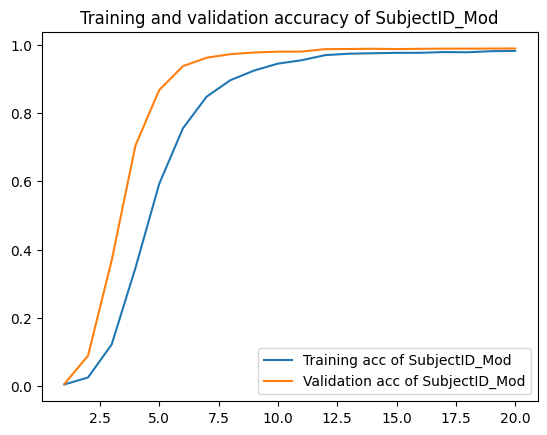

<Figure size 640x480 with 0 Axes>

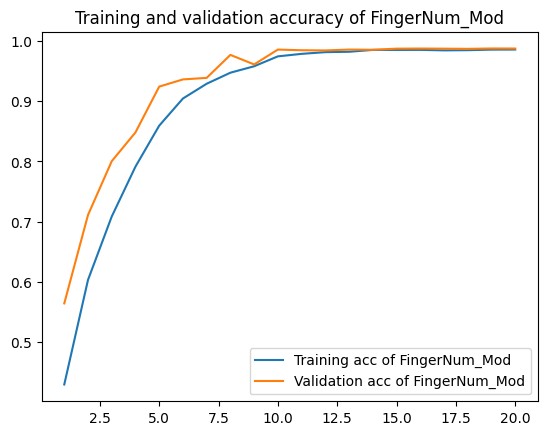

<Figure size 640x480 with 0 Axes>

In [20]:
acc = [0] * nets
val_acc = [0] * nets
loss = [0] * nets
val_loss = [0] * nets
for i in range(nets):
    acc[i] = history[i].history['accuracy']
    val_acc[i] = history[i].history['val_accuracy']
    loss[i] = history[i].history['loss']
    val_loss[i] = history[i].history['val_loss']

    epochs = range(1, len(acc[i]) + 1)
    
    plt.figure()
    plt.plot(epochs, acc[i], label='Training acc of '+model_name[i])
    plt.plot(epochs, val_acc[i], label='Validation acc of '+model_name[i])
    plt.title('Training and validation accuracy of '+model_name[i])
    plt.legend()
    plt.figure()
testing_acc_Id = model[0].evaluate([X_test], [y_SubjectID_test], verbose=0)
print("Id recognition accuracy: ",testing_acc_Id[1]*100, "%")
testing_acc_finger = model[1].evaluate([X_test], [y_fingerNum_test], verbose=0)
print("Finger recognition accuracy: ",testing_acc_finger[1]*100, "%")

188/188 [==============================] - 7s 35ms/step
565
left middle
 Fingerprint matches: person Id 565 left middle


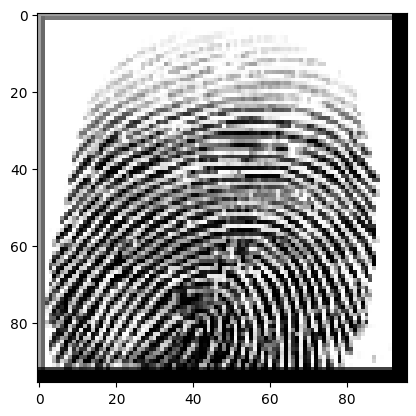

In [23]:
def show_fingername(fingernum):
    if fingernum>=5:
        fingername = "right "
        fingernum -= 5
    else: fingername = "left "
    if fingernum==0:
        fingername += "little"
    elif fingernum==1:
        fingername += "ring"
    elif fingernum==2:
        fingername += "middle"
    elif fingernum==3:
        fingername += "index"
    else: fingername += "thumb"
    return fingername


rand_fp_num = random.randint(0, X_test.shape[0]-1)
plt.imshow(X_test[rand_fp_num].reshape((96, 96)), cmap ='gray')

y_SubjectID_pred = model[0].predict(X_test)
y_fingerNum_pred = model[1].predict(X_test)
Id_pred = np.argmax(y_SubjectID_pred[rand_fp_num]) #return highest matched id
Id_real = np.argmax(y_SubjectID_test[rand_fp_num]) #return id of person in test set
fingerNum_pred = np.argmax(y_fingerNum_pred[rand_fp_num])
fingerNum_real = np.argmax(y_fingerNum_test[rand_fp_num])

print(Id_pred)
print(show_fingername(fingerNum_pred))

if Id_pred==Id_real and fingerNum_pred==fingerNum_real:
    print(" Fingerprint matches: person Id",Id_pred, show_fingername(fingerNum_pred))
else:
    print("Wrong")